In [ ]:
import pandas as pd
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [ ]:
df_meetings = pd.read_csv("./data/gold/panel_data_meetings_Ym_v020701.csv")
df_meps = pd.read_csv("./data/gold/panel_data_meps_Ym_v020702.csv")
df_questions = pd.read_csv("./data/gold/panel_data_questions_Ym_v020703.csv")


In [ ]:
# Find and remove highly correlated features
def remove_collinear_features(X, threshold=0.95):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("to_drop", to_drop)
    return X.drop(to_drop, axis=1)


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i) for i in range(X.shape[1])
    ]
    return vif_data

In [ ]:
df_raw = pd.read_csv("./data/gold/panel_data_w_topics_yyyy_mm_max.csv")

In [21]:
df = df_raw.dropna()

# Descritivas

In [18]:
pd.set_option("display.max_rows", 200)

df.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
meeting_l_agriculture,8140.0,0.597297,0.490472,0.0,0.000000,1.000000,1.000000,1.000000
meeting_l_days_since_registration,8140.0,3741.797297,1610.415717,0.0,2861.250000,4190.500000,5013.000000,5948.000000
meeting_l_economics_and_trade,8140.0,0.927518,0.259300,0.0,1.000000,1.000000,1.000000,1.000000
meeting_l_education,8140.0,0.686118,0.464098,0.0,0.000000,1.000000,1.000000,1.000000
meeting_l_environment_and_climate,8140.0,0.885135,0.318878,0.0,1.000000,1.000000,1.000000,1.000000
meeting_l_foreign_and_security_affairs,8140.0,0.858231,0.348835,0.0,1.000000,1.000000,1.000000,1.000000
meeting_l_health,8140.0,0.779975,0.414288,0.0,1.000000,1.000000,1.000000,1.000000
meeting_l_human_rights,8140.0,0.644840,0.478591,0.0,0.000000,1.000000,1.000000,1.000000
meeting_l_infrastructure_and_industry,8140.0,0.891155,0.311464,0.0,1.000000,1.000000,1.000000,1.000000
meeting_l_ln_max_budget,8140.0,14.433581,2.410508,0.0,13.122363,14.220976,15.538348,24.658174


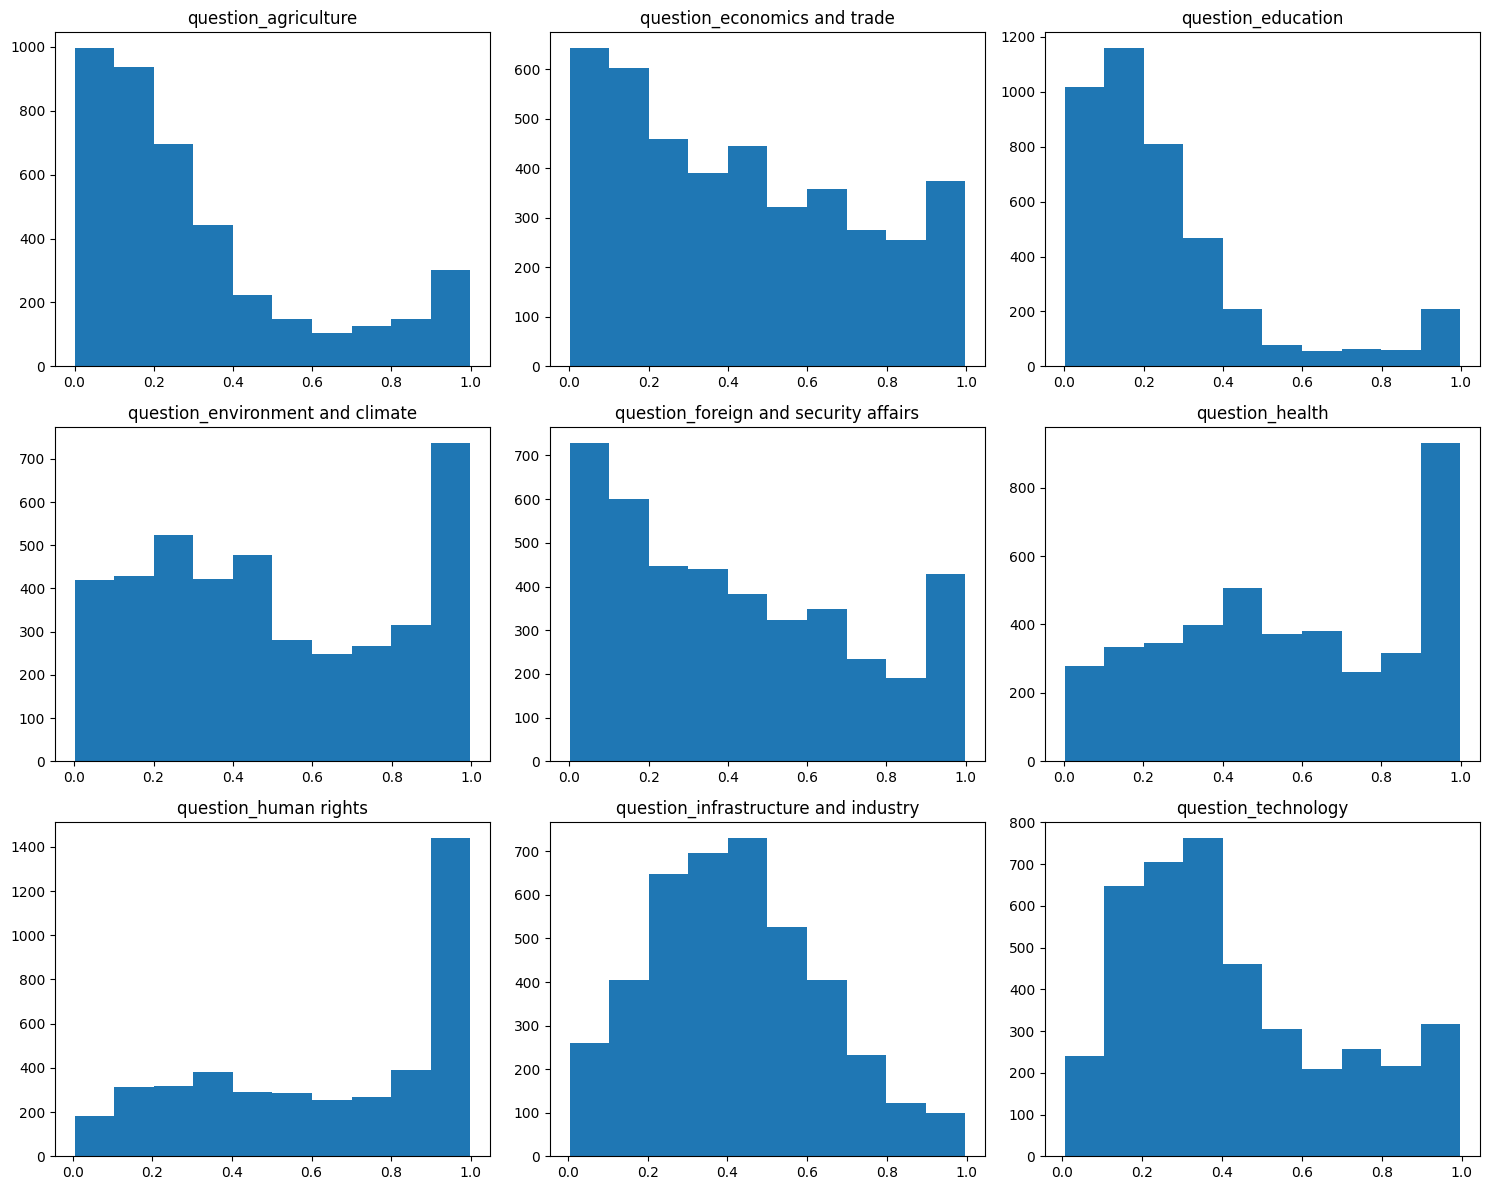

In [24]:
question_columns = [c for c in df.columns if "question" in c]
num_cols = 3
num_rows = int(np.ceil(len(question_columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
axes = axes.flatten()

for i, c in enumerate(question_columns):
    axes[i].hist(df[df[c] > 0][c])
    axes[i].set_title(c)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove unused subplots

plt.tight_layout()
plt.show()

# INferencia

In [25]:
columns = df.columns

for c in columns:
    print(c)

date_yyyy_mm
member_id
meeting_l_agriculture
meeting_l_days_since_registration
meeting_l_economics_and_trade
meeting_l_education
meeting_l_environment_and_climate
meeting_l_foreign_and_security_affairs
meeting_l_health
meeting_l_human_rights
meeting_l_infrastructure_and_industry
meeting_l_ln_max_budget
meeting_technology
mep_ - CHAIR
mep_ - QUAESTOR
mep_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR
mep_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR_VICE
mep_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER
mep_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER_SUBSTITUTE
mep_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR
mep_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR_VICE
mep_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER
mep_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE
mep_COMMITTEE_PARLIAMENTARY_SUB - CHAIR
mep_COMMITTEE_PARLIAMENTARY_SUB - CHAIR_VICE
mep_COMMITTEE_PARLIAMENTARY_SUB - MEMBER
mep_COMMITTEE_PARLIAMENTARY_SUB - MEMBER_SUBSTITUTE
mep_COMMITTEE_PARLIAMENTARY_TEMPORARY - CHAIR
mep_COMMITTEE_PARLIAMENTARY_TEMP

In [31]:
y_column = "question_education"
x_columns = [
    c
    for c in df.columns
    if "question" not in c and c not in ["date", "date_yyyy_mm", "member_id"]
]

In [32]:
Y = df[y_column]
X = df[x_columns]
X = sm.add_constant(X)
model = sm.OLS(Y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     question_education   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     7.814
Date:                Wed, 16 Jul 2025   Prob (F-statistic):          6.83e-104
Time:                        18:57:23   Log-Likelihood:                 1575.5
No. Observations:                8140   AIC:                            -2941.
Df Residuals:                    8035   BIC:                            -2206.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:
# Now, run a regression with fixed effects
from linearmodels import PanelOLS

# Set the index for panel data
df_panel = df.set_index(["ID", "date"])

# Prepare dependent and independent variables
Y = df_panel[y_column]
X = df_panel[x_columns]

# X = remove_collinear_features(X)


# Run panel regression with entity (MEP) fixed effects
model = PanelOLS(Y, X, entity_effects=True)
results_fe = model.fit()

print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:              questions   R-squared:                        0.0088
Estimator:                   PanelOLS   R-squared (Between):              0.5158
No. Observations:             4301187   R-squared (Within):               0.0088
Date:                Sun, Mar 16 2025   R-squared (Overall):              0.0198
Time:                        22:21:39   Log-likelihood                -1.604e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      647.02
Entities:                        1353   P-value                           0.0000
Avg Obs:                       3179.0   Distribution:              F(59,4299775)
Min Obs:                       3179.0                                           
Max Obs:                       3179.0   F-statistic (robust):             647.02
                            

In [36]:
type(X)

pandas.core.frame.DataFrame

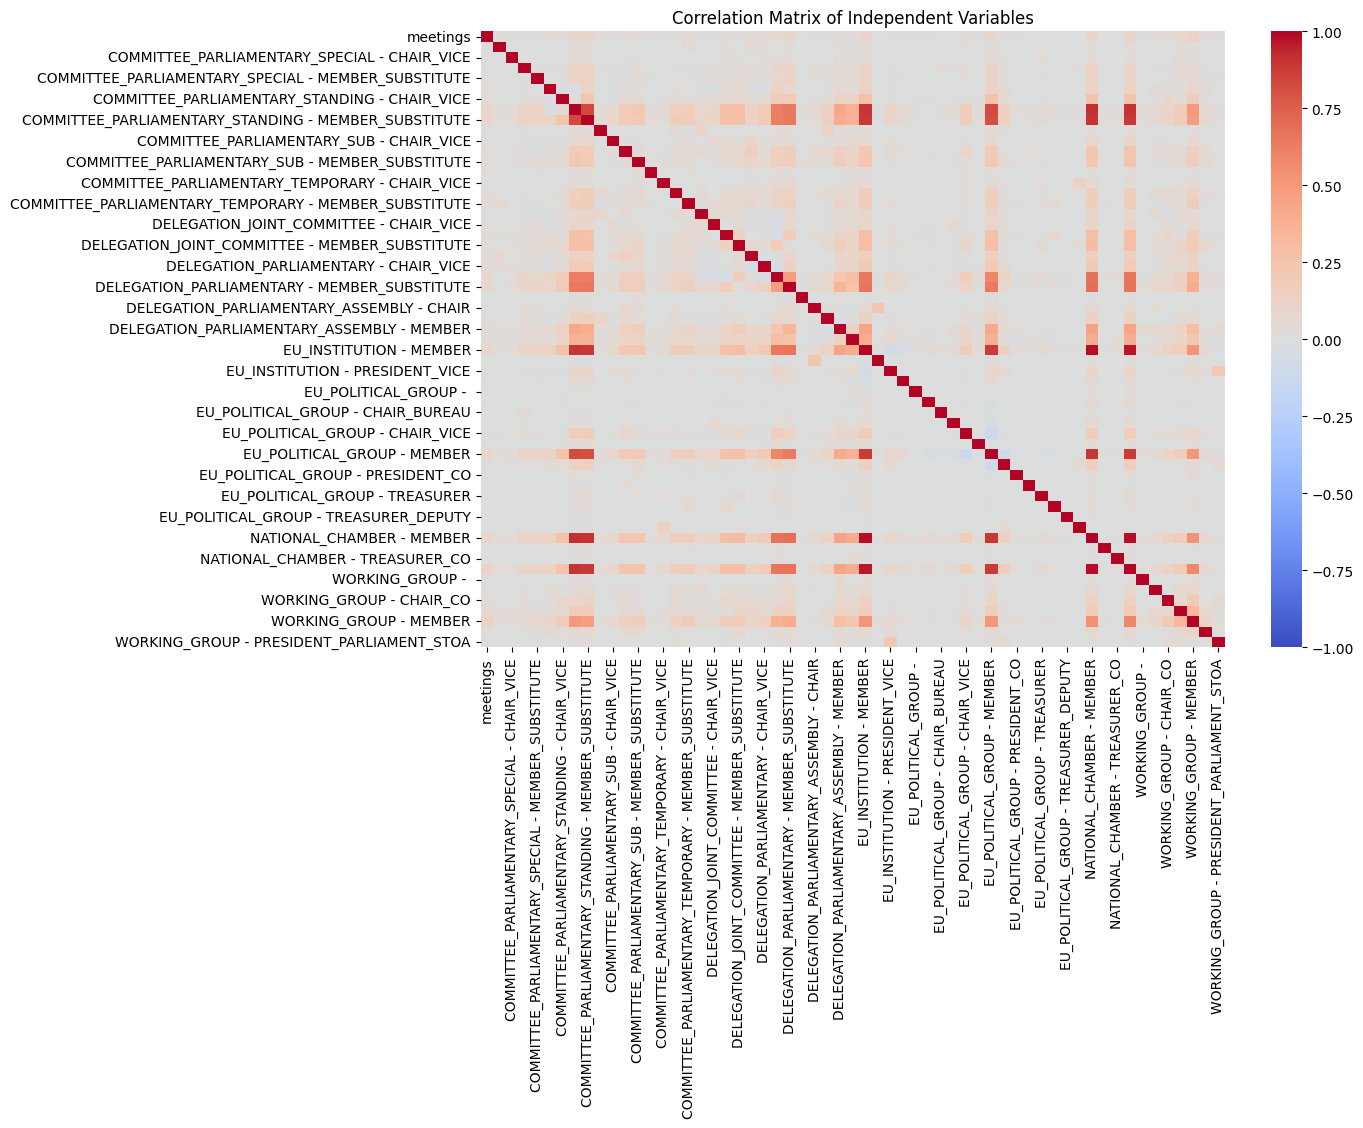

In [ ]:
# Check correlation matrix
correlation_matrix = X.corr()


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix of Independent Variables")
plt.show()